# Communicate Data Findings (Ford GoBike System Data)

In [1]:
# Initialization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
f_bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(f_bike.shape)

(519700, 15)


In [4]:
f_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
print(f_bike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [6]:
f_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [7]:
# Check out of duplicates
f_bike.duplicated().sum()

0

In [8]:
# Check out unique values
f_bike.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
member_birth_year              73
member_gender                   3
dtype: int64

In [81]:
# Null values finding
f_bike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [10]:
f_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [11]:
# count of each gender
f_bike['member_gender'].value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [12]:
# Count of user type
f_bike['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [13]:
# Data copy 
clean_bike = f_bike.copy()

##  Data Wrangling
### Before starting data exploration i would like to do some data wrangling.

### Quality issues 
#### 1- Convert duration from second to hours
#### 2- Convet data type of  start_time and end_time 
#### 3 -Convert data type of gender to categorical
#### 4 - Extract day and month from strat_date
#### 5- Adding age column

### Tidness issues
1- Drop member_birth_year column

### 1- Convert duration from second to hours

### Code:

In [14]:
# Dividing duration_sec by 3600 to get duration in hours 
clean_bike['duration_min']=clean_bike['duration_sec']/60
clean_bike['duration_hr']=clean_bike['duration_min']/60
clean_bike['duration_min']=clean_bike['duration_min'].astype(float)
clean_bike['duration_hr']=clean_bike['duration_hr'].astype(float)
clean_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,22.252778
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,21.888889
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,12.713333
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000,17.270000
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,12.111944


### Teste

In [15]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
dtypes: float64(7), int64(4), object

### 2- Convet data type of start_time and end_time

### Code

In [16]:
#Convert dat type  to datastamp
clean_bike['start_time']=pd.to_datetime(clean_bike['start_time'])
clean_bike['end_time']=pd.to_datetime(clean_bike['end_time'])

### Test 

In [17]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
dtypes: datetime64[n

### 3 -Convert data type of gender to categorical

### Code

In [18]:
#Convert data  Type to catagory
clean_bike['member_gender']=clean_bike['member_gender'].astype('category')
clean_bike['user_type']=clean_bike['user_type'].astype('category')

### Test

In [19]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
dtypes: category

#### 4 - Extract day and month from strat_date

### Code

In [20]:
##Assumption made: The day and month in consideration for bike usage is the start date 
clean_bike['start_date'] =  pd.to_datetime(clean_bike['start_time'], format='%Y-%m-%d')
clean_bike['day'] = clean_bike['start_date'].apply(lambda r:r.day).astype(int)
clean_bike['month'] = clean_bike['start_date'].apply(lambda r:r.month).astype(int)

### Test

In [21]:
clean_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,duration_hr,start_date,day,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,22.252778,2017-12-31 16:57:39.654,31,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,21.888889,2017-12-31 15:56:34.842,31,12


In [22]:
clean_bike['month'].value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: month, dtype: int64

### Adding age column

#### To calcultate members age will subtract numbers birth date from 2019

### Code

In [23]:
# Age cumputing
clean_bike['member_age']=2019-clean_bike['member_birth_year']

### Test

In [24]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 21 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
duration_min               519700 non-null float64
duration_hr                519700 non-null float64
start_date      

In [25]:
# Propotion of user type
customer = clean_bike.query('user_type == "Customer"')['bike_id'].count()
subscriber = clean_bike.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / clean_bike['bike_id'].count()
subscriber_proportion = subscriber / clean_bike['bike_id'].count()

In [26]:
print(customer_proportion)
print(subscriber_proportion)

0.21256494131229556
0.7874350586877045


In [27]:
# Propotion of members gender
male = clean_bike.query('member_gender == "Male"')['bike_id'].count()
female = clean_bike.query('member_gender == "Female"')['bike_id'].count()

male_proportion = male / clean_bike['bike_id'].count()
female_proportion = female / clean_bike['bike_id'].count()

In [28]:
print(male_proportion)
print(female_proportion)

0.6702289782566866
0.1897652491822205


### What is the structure of your dataset?¶
I have 519700 entries in dataset incude information regards to ford bike 2017 

 Trip Duration (seconds)
 
 Start Time and Date
 
 End Time and Date
 
 Start Station ID
 
 Start Station Name
 
 Start Station Latitude
 
 Start Station Longitude
 
 End Station ID
 
 End Station Name
 
 End Station Latitude
 
 End Station Longitude
 
 Bike ID
 
 User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
 
 Member Year of Birth
 
 Member Gender

### What is/are the main feature(s) of interest in your dataset?¶
I'm most interested in figuring out what features are most impact on bike renting in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?¶
Renting time.

Memebers gender

Members age

### Univariate Exploration

#### Average duration 

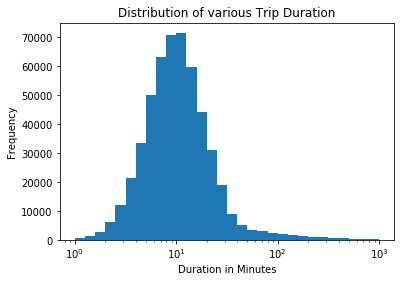

In [29]:
# Time duration in minuties 
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = clean_bike , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

####  Diagram shows that the averge duration in minutes is 13.8 

Text(0.5, 1.0, 'Usage of Bike by Months')

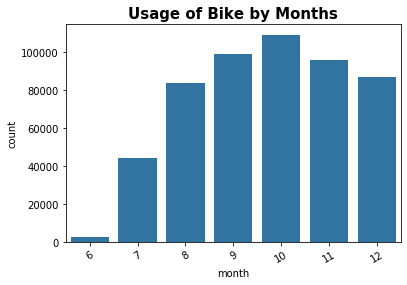

In [30]:
# Usage of bike riders per month
base_color=sns.color_palette()[0]
# Monthly sharing system
sns.countplot(data=clean_bike,x='month',color=base_color)
plt.xticks(rotation=30)
plt.title('Usage of Bike by Months', fontsize=15, fontweight='semibold')

#### Plot shaows that October in the most Month in duration count

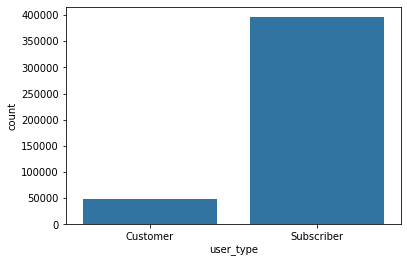

In [82]:
# Count of user type
sns.countplot(data=clean_bike,x='user_type',color = base_color)

In [83]:
# count of satations riders count
top_10= clean_bike['start_station_name'].value_counts().index[0:10]

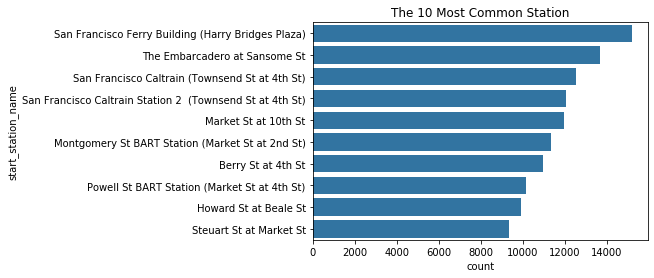

In [33]:
# Top 10 start Stsiotions 
base_color = sns.color_palette()[0]
sns.countplot(data = clean_bike, y = 'start_station_name', color = base_color, order= top_10)
plt.title("The 10 Most Common Station");

#### As we can see above "San Francisco Ferry Building" is the highly demanded  staion in Ford GoBike system, which is to incresae number of bikes in those stations.

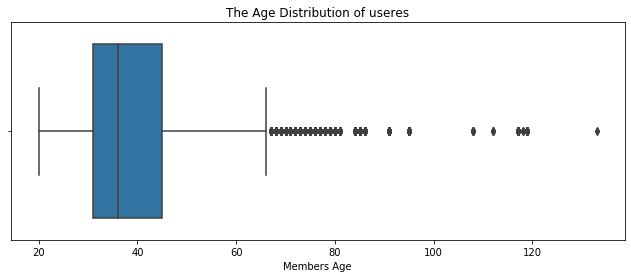

In [34]:
# Finding age rannge and outlire values.
plt.figure(figsize=(11,4))
sns.boxplot(x='member_age', data=clean_bike)
plt.title("The Age Distribution of useres")
plt.xlabel("Members Age");

In [84]:
# Exclude members more than 63
clean_bike = clean_bike[clean_bike['member_age']<=63]

In [85]:
clean_bike['member_age'].mean()

37.92452494396197

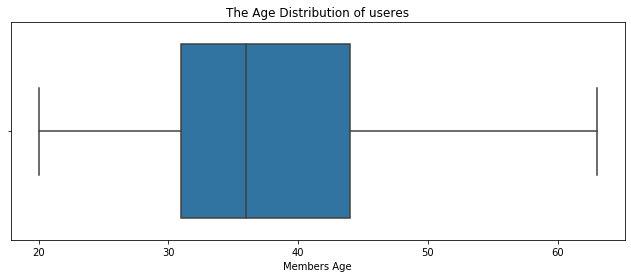

In [86]:
# Removing outlier values 
plt.figure(figsize=(11,4))
sns.boxplot(x='member_age', data=clean_bike)
plt.title("The Age Distribution of useres")
plt.xlabel("Members Age");

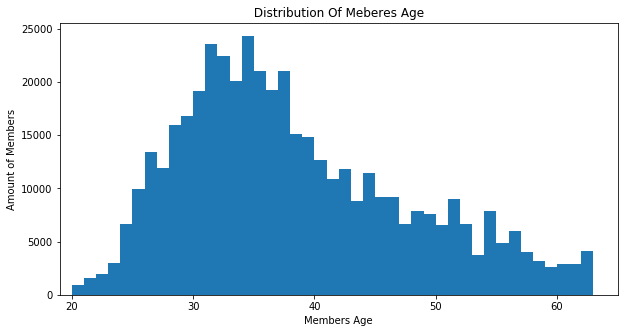

In [38]:
# Distribution Of Meberes Age
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, clean_bike['member_age'].max()+1, 1)
plt.hist(data = clean_bike, x = 'member_age', bins = bin_edges)
#zoom in
plt.xlim(19,65)
plt.title('Distribution Of Meberes Age ')
plt.xlabel('Members Age')
plt.ylabel('Amount of Members');

#### Abovebox  plot illustrates age range between 20 and 63, and averge age is 38. wher is outlier vlues comes from? It comes from none values when we sustract it from 2019. Histogram show the distribution of  members age between 30 and 40 and teh most of them abut 37-38.

In [39]:
len(clean_bike['member_gender'])

443895

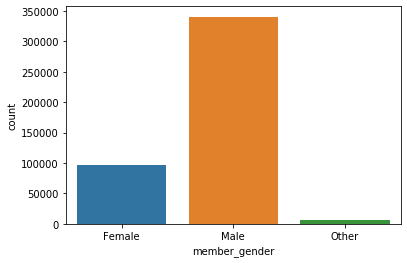

In [40]:
# Count of member gender
sns.countplot(data=clean_bike,x='member_gender')
plt.xticks(rotation=360);

#### Male members is grater than female by more than 3 times 

In [41]:
# Adding Column weekday.
clean_bike['weekday']=clean_bike['start_time'].dt.strftime('%a')

Text(0.5, 1.0, 'Riders Per Weekdays')

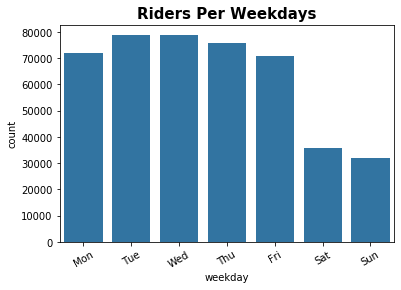

In [42]:
# Find out which week day has a highly demanded
weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data=clean_bike,x='weekday',color=base_color,order=weekday)
plt.xticks(rotation=30)
plt.title('Riders Per Weekdays', fontsize=15, fontweight='semibold')

### Bivariate Exploration¶
In  this part i will fide out the relation between tow variables and the impact of each other

### Duration  vs months

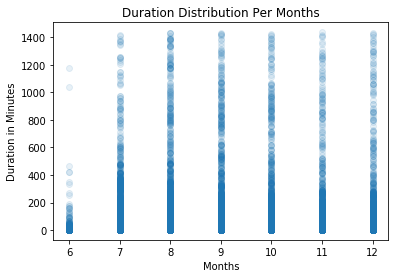

In [88]:
# Duration Per month
plt.scatter(data = clean_bike , x = 'month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Duration Distribution Per Months')
plt.xlabel('Months')
plt.ylabel('Duration in Minutes');

#### The plot shows that June is lowst month of trip duration and in other hand Augest,September, and Augest are the most months in trip duration

### Users Type VS Months

In [44]:
user_type_month = clean_bike.groupby(["month", "user_type"]).size().reset_index()

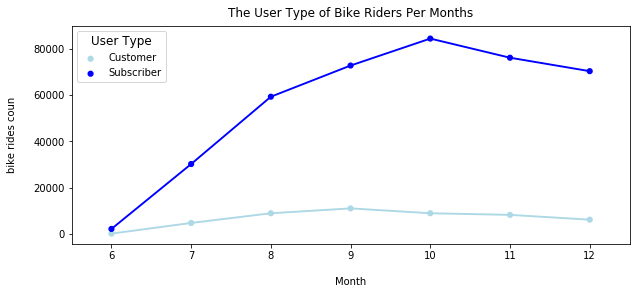

In [45]:
# User type VS month
plt.figure(figsize=(10,4))
my_palette = {'Subscriber':'blue', 'Customer':'lightblue'}
ax = sns.pointplot(x='month', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_month)
plt.title('The User Type of Bike Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel('bike rides coun', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':12})

#### Bike riders numbers incresed along the time and slightly decreased from October. From my point veiw i think its regard to strating of winter. Customers amount is higher than subscriber along the period.

### Users's Age group Type VS Months

In [46]:
# Age grouping 
clean_bike['age_group'] = pd.cut(clean_bike.member_age, bins=[20, 30, 40, 50, 60], labels=['20-30','30-40','40-50','50-60'])

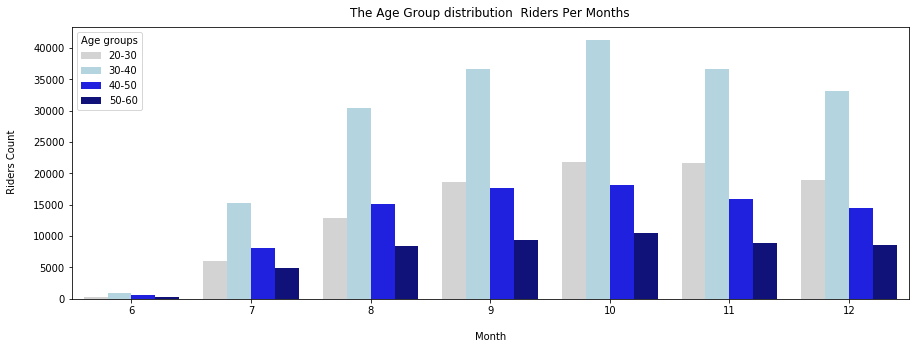

In [47]:
# Users's Age group Type VS Months
plt.figure(figsize=(15,5))
my_palette = {'20-30': 'lightgrey', '30-40': 'lightblue', '40-50': 'blue','50-60': 'darkblue' }
ax = sns.countplot(x='month', hue='age_group', palette=my_palette, data=clean_bike[clean_bike['age_group'].isin(['20-30', '30-40', '40-50', '50-60'])].sort_values(by=['month', 'age_group']))
plt.title('The Age Group distribution  Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel(' Riders Count', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':10})

#### Diagram shows that the age group 30-40 is the most of riders along the time and October is the highsest demanded month. 

### Users's Age group Type by  Weekday

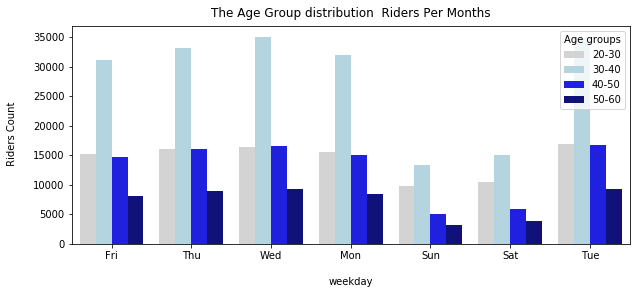

In [48]:
# Users's Age group Type by Weekday
plt.figure(figsize=(10,4))
my_palette = {'20-30': 'lightgrey', '30-40': 'lightblue', '40-50': 'blue','50-60': 'darkblue' }
ax = sns.countplot(x='weekday', hue='age_group', palette=my_palette, data=clean_bike[clean_bike['age_group'].isin(['20-30', '30-40', '40-50', '50-60'])].sort_values(by=['month', 'age_group']))
plt.title('The Age Group distribution  Riders Per Months', y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel(' Riders Count', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':10})

#### Riders count starts increase from Friday untill get the peak in Wednesday, then sterts decrease. Weekend in lowset demanded durong the week. 

## Multivariate Exploration

#### Exploring the realtionship between three or more variables in the dataset

In [79]:
# Creating a function to compute count riders for other modeling and plotting
def countmember_g(datax,timetype,user_type,labelx,header,order):
    g = sns.catplot(data=datax, x=timetype, hue="member_gender", col=user_type, kind='count', sharey = False)
    g.set_axis_labels(labelx, "Riders Count")
    g.set_titles("{col_name}")
    g.fig.suptitle(header, y=1.03, fontsize=20, fontweight='semibold');

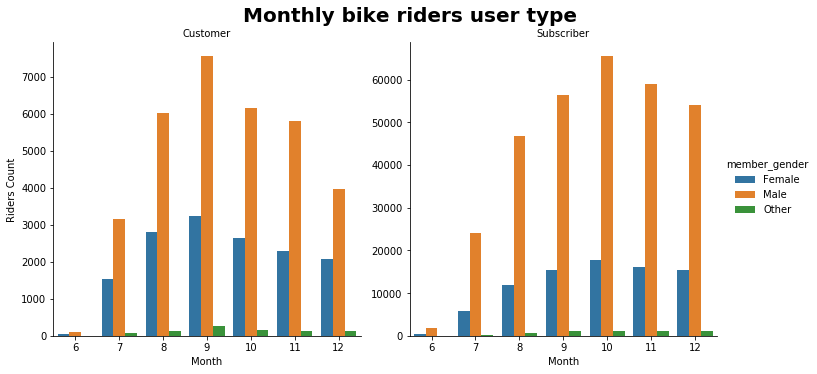

In [80]:
# 'Monthly bike riders per user type
countmember_g(clean_bike ,'month',"user_type",'Month','Monthly bike riders per user type',ordmonth);

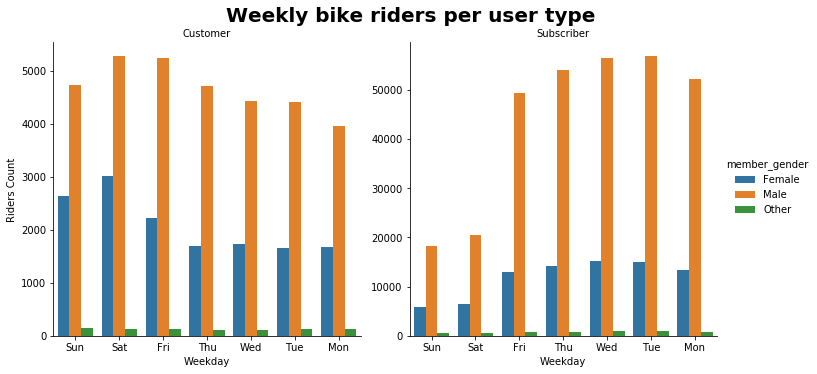

In [91]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
countmember_g(clean_bike,'weekday',"user_type",'Weekday','Weekly bike riders per user type',weekday);

### The Riders Count Per Gender  and User Type

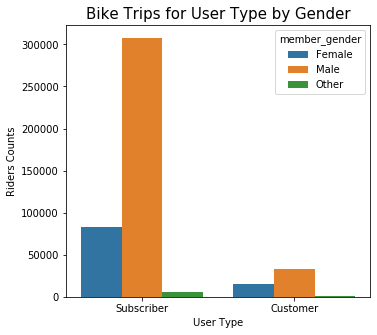

In [65]:
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
g = sns.countplot(data=clean_bike, x="user_type", hue="member_gender", order=clean_bike.user_type.value_counts().index)
g.set_title('Bike Trips for User Type by Gender',fontsize=15)
g.set_xlabel('User Type')
g.set_ylabel('Riders Counts');

####  In both user type male greater than female, female subscriber larger than female customer. 

### The The Riders Count ) Per age gruop and User Type

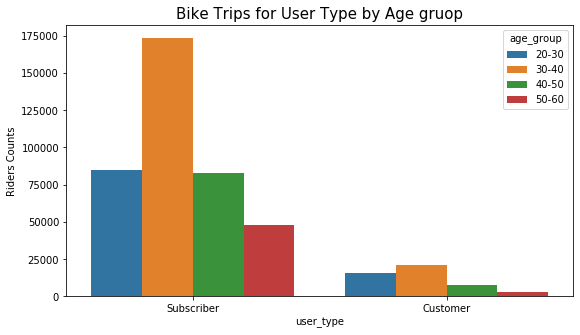

In [61]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
g = sns.countplot(data=clean_bike, x="user_type", hue="age_group", order=clean_bike.user_type.value_counts().index)
g.set_title('Bike Trips for User Type by Age gruop',fontsize=15)
g.set_xlabel('user_type')
g.set_ylabel('Riders Counts');

#### Age group 30-40 is highet whether in subscriber and customer. 20-3- and 40-50 are seems very close in subscriber but in customer 20-23 is higher than 40-50.

###  The Trip Duration(min) Per Month and User Type

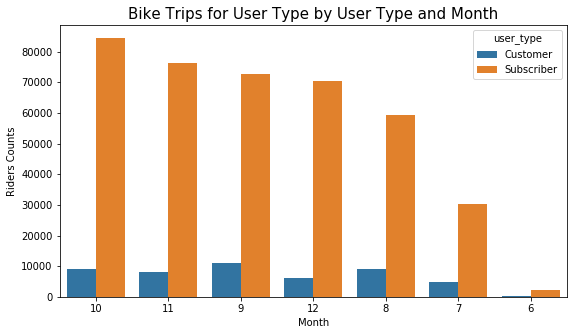

In [53]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
g = sns.countplot(data=clean_bike, x="month", hue="user_type", order=clean_bike.month.value_counts().index)
g.set_title('Bike Trips for User Type by User Type and Month',fontsize=15)
g.set_xlabel('Month')
g.set_ylabel('Riders Counts');

####  Subscribe user tend to ride a bike in October more than other months, but in other side cutomers tend to rent a bike in September. June is lowest month whether in both user types.

## Conclusion

#### In univariate exploration section, I found out that
#### 1-	most of bike trips duration around 13 minutes. 
#### 2-	Average users age is 38  
#### 3-	Most of users age between 30 to 40 years old age.
#### 4-	 Subscribers user are greater than customer by more than 3 times 
#### 5-	 and more than 75% of bike riders are male. 
#### 6-	 10 most common station names for Ford GoBike riders.
#### 7-	San Francisco Ferry Building" is the highly demanded station in Ford GoBike system, which is to increase number of bikes in those stations.
#### Bivariate Exploration:
#### 1-	October in 2017 has the most trip duration. However, June has the lowest trip duration. I refer that the weather impacts the trip duration. 
#### 2-	Tuesday and Wednesday are the most duration workday. However the Sunday and Saturday are the lowest.
#### 3-	Users from 30 to 40 years old are more likely to rides bike for long durations
#### 4-	Males are the highest bike riders than females.
#### 5-	Customers tend to rent the bikes for longer time.
#### 6-	Age group 30-40 is highest wاether in subscriber and customer. 20-3- and 40-50 are seems very close in subscriber but in customer 20-23 is higher than 40-50.
.